### 5.2.1 缺失值的检测

In [2]:
import pandas as pd
import numpy as np
na_df = pd.DataFrame({'A':[1, 2, np.NaN,4],
                          'B':[3, 4, 4, 5],
                          'C':[5, 6, 7, 8],
                          'D':[7, 5, np.NaN, np.NaN]})
na_df
#print(na_df)

,A,B,C,D
0,1.0,3,5,7.0
1,2.0,4,6,5.0
2,NaN,4,7,NaN
3,4.0,5,8,NaN


In [3]:
#使用isna()方法检测na_df中是否存在缺失值
na_df.isna()

,A,B,C,D
0,False,False,False,False
1,False,False,False,False
2,True,False,False,True
3,False,False,False,True


In [4]:
#使用isnull()方法检测na_df中是否存在缺失值
na_df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,False,False
2,True,False,False,True
3,False,False,False,True


In [3]:
na_df.notna()

,A,B,C,D
0,True,True,True,True
1,True,True,True,True
2,False,True,True,False
3,True,True,True,False


In [5]:
#再使用notnull进行测试
na_df.notnull()

,A,B,C,D
0,True,True,True,True
1,True,True,True,True
2,False,True,True,False
3,True,True,True,False


### 5.2.2 缺失值的处理

In [6]:
# 删除缺失值所在的一行数据
na_df.dropna()

,A,B,C,D
0,1.0,3,5,7.0
1,2.0,4,6,5.0


In [7]:
# 保留至少有3个非NaN值的行
na_df.dropna(thresh=3)

,A,B,C,D
0,1.0,3,5,7.0
1,2.0,4,6,5.0
3,4.0,5,8,NaN


In [9]:
na_df.dropna(subset=['A'])

,A,B,C,D
0,1.0,3,5,7.0
1,2.0,4,6,5.0
3,4.0,5,8,NaN


In [10]:
# 计算A列的平均数，并保留一位小数
col_a = np.around(np.mean(na_df['A']), 1)
# 计算D列的平均数，并保留一位小数
col_d = np.around(np.mean(na_df['D']), 1)
# 将计算的平均数填充到指定的列
na_df.fillna({'A':col_a, 'D':col_d})

,A,B,C,D
0,1.0,3,5,7.0
1,2.0,4,6,5.0
2,2.3,4,7,6.0
3,4.0,5,8,6.0


In [11]:
na_df.fillna(method='ffill')

,A,B,C,D
0,1.0,3,5,7.0
1,2.0,4,6,5.0
2,2.0,4,7,5.0
3,4.0,5,8,5.0


In [8]:
na_df.interpolate(method='linear')

,A,B,C,D
0,1.0,3,5,7.0
1,2.0,4,6,5.0
2,3.0,4,7,5.0
3,4.0,5,8,5.0


### 5.3.1 重复值的检测

In [13]:
person_info = pd.DataFrame({'name': ['刘婷婷', '王淼', '彭岩', '刘华', '刘华', '周华'],
                'age': [24, 23, 29, 22, 22, 27],
                'height': [162, 165, 175, 175, 175, 178],
                'gender': ['女', '女', '男', '男', '男', '男']})
person_info

,name,age,height,gender
0,刘婷婷,24,162,女
1,王淼,23,165,女
2,彭岩,29,175,男
3,刘华,22,175,男
4,刘华,22,175,男
5,周华,27,178,男


In [14]:
# 检测person_info对象中的重复值
person_info.duplicated()  

0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [16]:
person_info.duplicated(keep=False)  
#将keep属性赋值为False 会将数据中的重复中全部标记

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

### 5.3.2 重复值的处理

In [17]:
# 删除person_info对象中的重复值
person_info.drop_duplicates()

,name,age,height,gender
0,刘婷婷,24,162,女
1,王淼,23,165,女
2,彭岩,29,175,男
3,刘华,22,175,男
5,周华,27,178,男


In [18]:
person_info.drop_duplicates(ignore_index=True)      
#将删除重复值的序列进行重新排序     由0 1 2 3 5变为0 1 2 3 4 

,name,age,height,gender
0,刘婷婷,24,162,女
1,王淼,23,165,女
2,彭岩,29,175,男
3,刘华,22,175,男
4,周华,27,178,男


### 5.4.1 异常值检测

In [12]:
import numpy as np
import pandas as pd
def three_sigma(ser):
    """
    :param ser: 表示被检测的数据，接收DataFrame的一列数据
    :return: 异常值及其对应的行索引
    """
    # 计算平均值
    mean_data = ser.mean()
    # 计算标准差
    std_data = ser.std()
    #小于μ-3σ或大于μ+3σ的数值均为异常值
    rule = (mean_data-3*std_data>ser) | (mean_data+3*std_data<ser)
    # 返回异常值的行索引    其中np.arange(ser.shape[0])为获取样本数据总行数   arange：创建等差数组
    index = np.arange(ser.shape[0])[rule]
    # 获取异常值     iloc：获取行索引对应数据
    outliers = ser.iloc[index]
    return outliers
# 读取data.xlsx文件
excel_data  = pd.read_excel('data.xlsx')
# 对value列进行异常值检测
three_sigma(excel_data['value'])

121    13.2
710    13.1
Name: value, dtype: float64

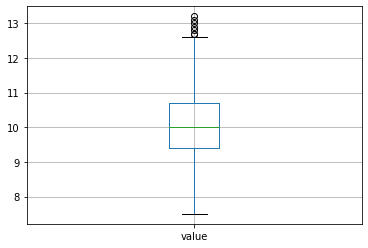

In [13]:
import pandas as pd
excel_data  = pd.read_excel('data.xlsx')
excel_data.boxplot(column='value')

In [19]:
import pandas as pd
import numpy as np
def box_outliers(ser):
    # 对待检测的数据集进行排序
    new_ser = ser.sort_values()
    # 判断数据的总数量是奇数还是偶数
    if new_ser.count() % 2 == 0:
        # 计算Q3、Q1、IQR
        Q3 = new_ser[int(len(new_ser) / 2):].median()
        Q1 = new_ser[:int(len(new_ser) / 2)].median()
    elif new_ser.count() % 2 != 0:
        Q3 = new_ser[int((len(new_ser)-1) / 2):].median()
        Q1 = new_ser[:int((len(new_ser)-1) / 2)].median()
    IQR = round(Q3 - Q1, 1)    #round函数保留1位小数
    rule = (round(Q3+1.5*IQR, 1) < ser)|(round(Q1-1.5*IQR, 1) > ser)
    index = np.arange(ser.shape[0])[rule]
    # 获取异常值及其索引
    outliers = ser.iloc[index]
    return outliers
excel_data = pd.read_excel('data.xlsx')
box_outliers(excel_data['value'])

0      12.7
121    13.2
255    12.7
353    13.0
694    12.8
710    13.1
724    12.9
Name: value, dtype: float64

#### 多学一招：正态分布检测    使用Scipy库中的stats统计模块下的kstest模块

In [20]:
import scipy.stats as stats      #如果没有Scipy需要使用pip进行安装   如果安装过程较慢可以考虑更换国内源
data  = pd.read_excel('data.xlsx')                  
u = data['value'].mean()                              # 计算均值
std = data['value'].std()                             # 计算标准差
stats.kstest(data['value'], 'norm', (u, std))     # 检测是否符合正态分布

KstestResult(statistic=0.02687507149307844, pvalue=0.4576286038861641)

### 5.4.2 异常值的处理

In [21]:
excel_data.drop([121, 710])
#删掉121 710行的异常数据   结果返回为998行

,Unnamed: 0,value
0,0,12.7
1,1,9.9
2,2,10.2
3,3,10.6
4,4,8.6
...,...,...
995,995,10.3
996,996,10.1
997,997,10.0
998,998,9.3


In [17]:
clean_data = excel_data.drop([121, 710])
# 再次检测数据中是否还有异常值
three_sigma(clean_data['value'])

Series([], Name: value, dtype: float64)

In [18]:
replace_data = excel_data.replace({13.2:10.2, 13.1:10.5})
# 根据行索引获取替换后的值
print(replace_data.loc[121])
print(replace_data.loc[710])

Unnamed: 0    121.0
value          10.2
Name: 121, dtype: float64
Unnamed: 0    710.0
value          10.5
Name: 710, dtype: float64


## 5.5案例——成都某地区二手房数据清理

In [19]:
import pandas as pd
import numpy as np
# 读取数据
second_hand_house = pd.read_excel('handroom.xlsx')
second_hand_house

,区,小区名称,标题,房屋信息,关注,地铁,单价(元/平米)
0,锦江,翡翠城四期,翡翠城四期跃层 采光视野好 可看沙河 客厅带有阳台,高楼层(共29层)| 2009年建 |2室1厅 | 85.21平米 | 东南,331人关注/ 5月前发布,近地铁,176036.0
1,锦江,时代豪庭一期,时代豪庭套三 中间楼层 有装修 业主处理资产出售,中楼层(共38层)| 2009年建 |3室1厅 | 155.79平米| 东南,137人关注/ 5月前发布,NaN,26959.4
2,锦江,卓锦城六期,卓锦城六期紫郡房源，套三，进门带入户,中楼层(共31层)| 2014年建 |3室1厅 | 89.33平米| 西南,36人关注 / 23天前发布,NaN,22612.8
3,锦江,星城银座,春熙路太古里标准套一出售，现租给民宿。,高楼层(共11层) | 2003年建 | 1室0厅 | 51.07平米 | 南,29人关注 / 5月前发布,近地铁,18014.5
4,锦江,新莲新苑,新莲新苑优质套三，诚心出售，近沙河，采光视野好。,高楼层(共7层) | 2001年建 | 3室1厅 | 77.7平米 | 东南,14人关注 / 5月前发布,NaN,13513.5
...,...,...,...,...,...,...,...
1053,锦江,锦东庭园,锦东庭院居家套三 采光视野好,高楼层(共34层) | 2015年建 | 3室2厅 | 113平米 | 东南,23人关注 / 1年前发布,近地铁,25663.7
1054,锦江,五世同堂街72号,五世同堂街72号 2室1厅 南,高楼层(共7层) | 1995年建 | 2室1厅 | 55.99平米 | 南,1人关注 / 9天前发布,近地铁,14288.3
1055,锦江,城市博客VC时代,锦江区红星路在售套一 标准套一,高楼层(共33层) | 2009年建 | 1室1厅 | 46.69平米 | 东南,33人关注 / 1年前发布,近地铁,18205.2
1056,锦江,大地城市脉搏,春熙路大地城市脉搏 办公装修 二套打通生活交通方便,中楼层(共20层) | 2004年建 | 2室1厅 | 75.73平米 | 东南,1人关注 / 6月前发布,近地铁,25089.1


In [20]:
second_hand_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   区         1058 non-null   object 
 1   小区名称      1057 non-null   object 
 2   标题        1058 non-null   object 
 3   房屋信息      1058 non-null   object 
 4   关注        1058 non-null   object 
 5   地铁        441 non-null    object 
 6   单价(元/平米)  1058 non-null   float64
dtypes: float64(1), object(6)
memory usage: 58.0+ KB


In [21]:
# 删除小区名称列的缺失值
second_hand_house = second_hand_house.dropna(subset=['小区名称'])
second_hand_house

,区,小区名称,标题,房屋信息,关注,地铁,单价(元/平米)
0,锦江,翡翠城四期,翡翠城四期跃层 采光视野好 可看沙河 客厅带有阳台,高楼层(共29层)| 2009年建 |2室1厅 | 85.21平米 | 东南,331人关注/ 5月前发布,近地铁,176036.0
1,锦江,时代豪庭一期,时代豪庭套三 中间楼层 有装修 业主处理资产出售,中楼层(共38层)| 2009年建 |3室1厅 | 155.79平米| 东南,137人关注/ 5月前发布,NaN,26959.4
2,锦江,卓锦城六期,卓锦城六期紫郡房源，套三，进门带入户,中楼层(共31层)| 2014年建 |3室1厅 | 89.33平米| 西南,36人关注 / 23天前发布,NaN,22612.8
3,锦江,星城银座,春熙路太古里标准套一出售，现租给民宿。,高楼层(共11层) | 2003年建 | 1室0厅 | 51.07平米 | 南,29人关注 / 5月前发布,近地铁,18014.5
4,锦江,新莲新苑,新莲新苑优质套三，诚心出售，近沙河，采光视野好。,高楼层(共7层) | 2001年建 | 3室1厅 | 77.7平米 | 东南,14人关注 / 5月前发布,NaN,13513.5
...,...,...,...,...,...,...,...
1053,锦江,锦东庭园,锦东庭院居家套三 采光视野好,高楼层(共34层) | 2015年建 | 3室2厅 | 113平米 | 东南,23人关注 / 1年前发布,近地铁,25663.7
1054,锦江,五世同堂街72号,五世同堂街72号 2室1厅 南,高楼层(共7层) | 1995年建 | 2室1厅 | 55.99平米 | 南,1人关注 / 9天前发布,近地铁,14288.3
1055,锦江,城市博客VC时代,锦江区红星路在售套一 标准套一,高楼层(共33层) | 2009年建 | 1室1厅 | 46.69平米 | 东南,33人关注 / 1年前发布,近地铁,18205.2
1056,锦江,大地城市脉搏,春熙路大地城市脉搏 办公装修 二套打通生活交通方便,中楼层(共20层) | 2004年建 | 2室1厅 | 75.73平米 | 东南,1人关注 / 6月前发布,近地铁,25089.1


In [22]:
# 对删除缺失值后的数据进行重复值检测
second_hand_house.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1053    False
1054    False
1055    False
1056    False
1057    False
Length: 1057, dtype: bool

In [23]:
# 显示二手房数据中的重复项
second_hand_house = second_hand_house[second_hand_house.duplicated().values == True]
second_hand_house 

,区,小区名称,标题,房屋信息,关注,地铁,单价(元/平米)
54,锦江,柳江新居五期,琉璃场柳江新居五期带装修套二，房东诚心出售,低楼层(共18层) | 2010年建 | 2室1厅 | 80.97平米 | 南 北,58人关注 / 3月前发布,近地铁,13832.3
55,锦江,锦洲花园,此房是锦洲花园中庭跃层，顶楼带大花园,高楼层(共6层) | 2004年建 | 3室2厅 | 124.68平米 | 西北,135人关注 / 5月前发布,NaN,19890.9
97,锦江,澳龙名城,澳龙名城标准套四双卫随时可看房！,低楼层(共16层) | 2009年建 | 4室2厅 | 116.58平米 | 东南 西北,95人关注 / 8月前发布,近地铁,25561.8
98,锦江,嘉和园二期,锦江 川师 狮子山 嘉和园 套二出售,低楼层(共6层) | 2002年建 | 2室2厅 | 74平米 | 东,19人关注 / 8月前发布,近地铁,12567.6
99,锦江,钢管厂五区,海椒市街15号标准套二，户型方正不临街。,高楼层(共7层) | 1988年建 | 2室1厅 | 82平米 | 东南,60人关注 / 1年前发布,NaN,11097.6
100,锦江,水碾河路南46号,水碾河 底层 家带店 标准套二,低楼层(共6层) | 1998年建 | 2室1厅 | 56.28平米 | 东南,55人关注 / 4月前发布,近地铁,12970.9
101,锦江,蓝润锦江春天,蓝润锦江春天 标准套二 家具家电全带,低楼层(共18层) | 2015年建 | 2室1厅 | 54.29平米 | 西南,7人关注 / 3月前发布,NaN,20261.6
102,锦江,宏济新路95号,装修很好的套二，拎包入住，相当新,高楼层(共6层) | 1985年建 | 2室1厅 | 56.76平米 | 西南,123人关注 / 7月前发布,NaN,13037.4
129,锦江,绿地468公馆三期,绿地468公馆三期清水套二，户型方正。,高楼层(共33层) | 2015年建 | 2室1厅 | 77平米 | 东南,78人关注 / 4月前发布,NaN,20324.7
254,锦江,沙河壹号一期,沙河壹号，房东诚心卖，高楼层，采光好，视野开阔！！,高楼层(共34层) | 2011年建 | 2室1厅 | 72.89平米 | 西,123人关注 / 8月前发布,近地铁,18521.1


In [24]:
# 删除重复值，并对索引重新排序
second_hand_house = second_hand_house.drop_duplicates(ignore_index=True)
second_hand_house

,区,小区名称,标题,房屋信息,关注,地铁,单价(元/平米)
0,锦江,柳江新居五期,琉璃场柳江新居五期带装修套二，房东诚心出售,低楼层(共18层) | 2010年建 | 2室1厅 | 80.97平米 | 南 北,58人关注 / 3月前发布,近地铁,13832.3
1,锦江,锦洲花园,此房是锦洲花园中庭跃层，顶楼带大花园,高楼层(共6层) | 2004年建 | 3室2厅 | 124.68平米 | 西北,135人关注 / 5月前发布,NaN,19890.9
2,锦江,澳龙名城,澳龙名城标准套四双卫随时可看房！,低楼层(共16层) | 2009年建 | 4室2厅 | 116.58平米 | 东南 西北,95人关注 / 8月前发布,近地铁,25561.8
3,锦江,嘉和园二期,锦江 川师 狮子山 嘉和园 套二出售,低楼层(共6层) | 2002年建 | 2室2厅 | 74平米 | 东,19人关注 / 8月前发布,近地铁,12567.6
4,锦江,钢管厂五区,海椒市街15号标准套二，户型方正不临街。,高楼层(共7层) | 1988年建 | 2室1厅 | 82平米 | 东南,60人关注 / 1年前发布,NaN,11097.6
5,锦江,水碾河路南46号,水碾河 底层 家带店 标准套二,低楼层(共6层) | 1998年建 | 2室1厅 | 56.28平米 | 东南,55人关注 / 4月前发布,近地铁,12970.9
6,锦江,蓝润锦江春天,蓝润锦江春天 标准套二 家具家电全带,低楼层(共18层) | 2015年建 | 2室1厅 | 54.29平米 | 西南,7人关注 / 3月前发布,NaN,20261.6
7,锦江,宏济新路95号,装修很好的套二，拎包入住，相当新,高楼层(共6层) | 1985年建 | 2室1厅 | 56.76平米 | 西南,123人关注 / 7月前发布,NaN,13037.4
8,锦江,绿地468公馆三期,绿地468公馆三期清水套二，户型方正。,高楼层(共33层) | 2015年建 | 2室1厅 | 77平米 | 东南,78人关注 / 4月前发布,NaN,20324.7
9,锦江,沙河壹号一期,沙河壹号，房东诚心卖，高楼层，采光好，视野开阔！！,高楼层(共34层) | 2011年建 | 2室1厅 | 72.89平米 | 西,123人关注 / 8月前发布,近地铁,18521.1


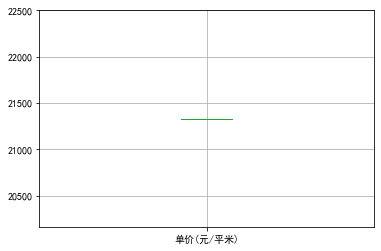

In [25]:
from matplotlib import pyplot as plt
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
estate = second_hand_house[second_hand_house['小区名称'].values == '翡翠城四期' ]
box = estate.boxplot(column='单价(元/平米)')
plt.show()

In [26]:
def box_outliers(ser):
    # 对需要检测的数据集进行排序
    new_ser = ser.sort_values()
    # 判断数据的总数量是奇数还是偶数
    if new_ser.count() % 2 == 0:
        # 分别计算Q3、Q1、IQR
        Q3 = new_ser[int(len(new_ser) / 2):].median()
        Q1 = new_ser[:int(len(new_ser) / 2)].median()
    elif new_ser.count() % 2 != 0:
        Q3 = new_ser[int((len(new_ser)-1) / 2):].median()
        Q1 = new_ser[:int((len(new_ser)-1) / 2)].median()
    IQR = round(Q3 - Q1, 1)
    rule = (round(Q3+1.5 * IQR, 1)<ser) | (round(Q1-1.5 * IQR, 1) > ser)
    index = np.arange(ser.shape[0])[rule]
    # 获取包含异常值的数据
    outliers = ser.iloc[index]
    return outliers

In [27]:
# 保存异常值索引
outliers_index_list = []
for i in set(second_hand_house['小区名称']):
    estate = second_hand_house[second_hand_house['小区名称'].
                                   values == i]
    outliers_index = box_outliers(estate['单价(元/平米)'])
    if len(outliers_index) != 0:
        # 将异常值的索引添加到定义的列表中
        outliers_index_list.append(outliers_index.index.tolist())
# 此时的outliers_index_list为嵌套列表，将其转换为单层列表
outliers_index_single_li = sum(outliers_index_list, [])

In [28]:
second_hand_house.drop(0)

,区,小区名称,标题,房屋信息,关注,地铁,单价(元/平米)
1,锦江,锦洲花园,此房是锦洲花园中庭跃层，顶楼带大花园,高楼层(共6层) | 2004年建 | 3室2厅 | 124.68平米 | 西北,135人关注 / 5月前发布,NaN,19890.9
2,锦江,澳龙名城,澳龙名城标准套四双卫随时可看房！,低楼层(共16层) | 2009年建 | 4室2厅 | 116.58平米 | 东南 西北,95人关注 / 8月前发布,近地铁,25561.8
3,锦江,嘉和园二期,锦江 川师 狮子山 嘉和园 套二出售,低楼层(共6层) | 2002年建 | 2室2厅 | 74平米 | 东,19人关注 / 8月前发布,近地铁,12567.6
4,锦江,钢管厂五区,海椒市街15号标准套二，户型方正不临街。,高楼层(共7层) | 1988年建 | 2室1厅 | 82平米 | 东南,60人关注 / 1年前发布,NaN,11097.6
5,锦江,水碾河路南46号,水碾河 底层 家带店 标准套二,低楼层(共6层) | 1998年建 | 2室1厅 | 56.28平米 | 东南,55人关注 / 4月前发布,近地铁,12970.9
6,锦江,蓝润锦江春天,蓝润锦江春天 标准套二 家具家电全带,低楼层(共18层) | 2015年建 | 2室1厅 | 54.29平米 | 西南,7人关注 / 3月前发布,NaN,20261.6
7,锦江,宏济新路95号,装修很好的套二，拎包入住，相当新,高楼层(共6层) | 1985年建 | 2室1厅 | 56.76平米 | 西南,123人关注 / 7月前发布,NaN,13037.4
8,锦江,绿地468公馆三期,绿地468公馆三期清水套二，户型方正。,高楼层(共33层) | 2015年建 | 2室1厅 | 77平米 | 东南,78人关注 / 4月前发布,NaN,20324.7
9,锦江,沙河壹号一期,沙河壹号，房东诚心卖，高楼层，采光好，视野开阔！！,高楼层(共34层) | 2011年建 | 2室1厅 | 72.89平米 | 西,123人关注 / 8月前发布,近地铁,18521.1
10,锦江,嘉和园一期,房东诚心出售，交通便利 配套齐全。,中楼层(共6层) | 2002年建 | 2室2厅 | 78.29平米 | 东南 西北,20人关注 / 6月前发布,近地铁,12517.6
